In [1]:
import os
import pandas as pd

# Path to the folder containing the CSV files
folder_path = './'  # Adjust this if the CSVs are in a different folder

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Read and combine all CSVs
df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df['source_file'] = file  # Optional: add a column with the filename
    df_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(df_list, ignore_index=True)

# Save the result to a new CSV file
combined_df.to_csv('combined_csvs.csv', index=False)

print("✅ All CSV files have been successfully combined into 'combined_csvs.csv'")


✅ All CSV files have been successfully combined into 'combined_csvs.csv'


In [2]:
combined_df.head()  # Display the first few rows of the combined DataFrame

,DATE,NAME_0,N,SCORE,source_file
0,2019-01-01,Afghanistan,224,0.675670,num_posts_and_sentiment_summary_2019.csv
1,2019-01-01,Albania,212,0.670625,num_posts_and_sentiment_summary_2019.csv
2,2019-01-01,Algeria,1405,0.682908,num_posts_and_sentiment_summary_2019.csv
3,2019-01-01,American Samoa,1,0.578695,num_posts_and_sentiment_summary_2019.csv
4,2019-01-01,Angola,722,0.567539,num_posts_and_sentiment_summary_2019.csv


In [3]:
combined_df

,DATE,NAME_0,N,SCORE,source_file
0,2019-01-01,Afghanistan,224,0.675670,num_posts_and_sentiment_summary_2019.csv
1,2019-01-01,Albania,212,0.670625,num_posts_and_sentiment_summary_2019.csv
2,2019-01-01,Algeria,1405,0.682908,num_posts_and_sentiment_summary_2019.csv
3,2019-01-01,American Samoa,1,0.578695,num_posts_and_sentiment_summary_2019.csv
4,2019-01-01,Angola,722,0.567539,num_posts_and_sentiment_summary_2019.csv
...,...,...,...,...,...
252452,2022-12-31,Vietnam,3106,0.673505,num_posts_and_sentiment_summary_2022-1.csv
252453,2022-12-31,"Virgin Islands, U.S.",98,0.493894,num_posts_and_sentiment_summary_2022-1.csv
252454,2022-12-31,Yemen,1500,0.640253,num_posts_and_sentiment_summary_2022-1.csv
252455,2022-12-31,Zambia,3786,0.642344,num_posts_and_sentiment_summary_2022-1.csv


In [4]:
# Clean column names: strip spaces, lowercase, replace spaces with underscores
combined_df.columns = (
    combined_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

In [6]:
combined_df.rename(columns={'name_0': 'country'}, inplace=True)


In [7]:
filtered_df = combined_df[combined_df['country'].isin(['Spain', 'Sweden'])]

In [8]:
filtered_df

,date,country,n,score,source_file
132,2019-01-01,Spain,74727,0.632933,num_posts_and_sentiment_summary_2019.csv
137,2019-01-01,Sweden,6816,0.616577,num_posts_and_sentiment_summary_2019.csv
293,2019-01-02,Spain,73857,0.597488,num_posts_and_sentiment_summary_2019.csv
298,2019-01-02,Sweden,6837,0.576716,num_posts_and_sentiment_summary_2019.csv
456,2019-01-03,Spain,77294,0.590331,num_posts_and_sentiment_summary_2019.csv
...,...,...,...,...,...
252115,2022-12-29,Sweden,6919,0.584878,num_posts_and_sentiment_summary_2022-1.csv
252269,2022-12-30,Spain,89763,0.595215,num_posts_and_sentiment_summary_2022-1.csv
252274,2022-12-30,Sweden,6328,0.602154,num_posts_and_sentiment_summary_2022-1.csv
252428,2022-12-31,Spain,145513,0.633712,num_posts_and_sentiment_summary_2022-1.csv


In [9]:
df_spain = combined_df[combined_df['country'] == 'Spain']
df_sweden = combined_df[combined_df['country'] == 'Sweden']


In [10]:
df_spain

,date,country,n,score,source_file
132,2019-01-01,Spain,74727,0.632933,num_posts_and_sentiment_summary_2019.csv
293,2019-01-02,Spain,73857,0.597488,num_posts_and_sentiment_summary_2019.csv
456,2019-01-03,Spain,77294,0.590331,num_posts_and_sentiment_summary_2019.csv
616,2019-01-04,Spain,74888,0.592296,num_posts_and_sentiment_summary_2019.csv
777,2019-01-05,Spain,78497,0.597714,num_posts_and_sentiment_summary_2019.csv
...,...,...,...,...,...
251793,2022-12-27,Spain,97131,0.602732,num_posts_and_sentiment_summary_2022-1.csv
251951,2022-12-28,Spain,102982,0.603458,num_posts_and_sentiment_summary_2022-1.csv
252110,2022-12-29,Spain,104918,0.599221,num_posts_and_sentiment_summary_2022-1.csv
252269,2022-12-30,Spain,89763,0.595215,num_posts_and_sentiment_summary_2022-1.csv


In [11]:
df_sweden

,date,country,n,score,source_file
137,2019-01-01,Sweden,6816,0.616577,num_posts_and_sentiment_summary_2019.csv
298,2019-01-02,Sweden,6837,0.576716,num_posts_and_sentiment_summary_2019.csv
461,2019-01-03,Sweden,6719,0.576244,num_posts_and_sentiment_summary_2019.csv
621,2019-01-04,Sweden,7179,0.570475,num_posts_and_sentiment_summary_2019.csv
782,2019-01-05,Sweden,7075,0.584050,num_posts_and_sentiment_summary_2019.csv
...,...,...,...,...,...
251798,2022-12-27,Sweden,8498,0.602497,num_posts_and_sentiment_summary_2022-1.csv
251956,2022-12-28,Sweden,7786,0.591504,num_posts_and_sentiment_summary_2022-1.csv
252115,2022-12-29,Sweden,6919,0.584878,num_posts_and_sentiment_summary_2022-1.csv
252274,2022-12-30,Sweden,6328,0.602154,num_posts_and_sentiment_summary_2022-1.csv


In [12]:
# Remove 'source_file' column
if 'source_file' in df_spain.columns:
    df_spain = df_spain.drop(columns=['source_file'])

if 'source_file' in df_sweden.columns:
    df_sweden = df_sweden.drop(columns=['source_file'])

In [13]:
# Export to separate CSV files
df_spain.to_csv('spain_data.csv', index=False)
df_sweden.to_csv('sweden_data.csv', index=False)

In [14]:
print("Spain sentiment score stats:")
print(df_spain['score'].describe())
median_score = df_spain['score'].median()
print(f"Median score: {median_score}")

#miminum score
min_score = df_spain['score'].min()
min_day = df_spain.loc[df_spain['score'] == min_score, 'date'].values[0]
print(f"Most negative day: {min_day} with score {min_score}")

#maximum score
max_score = df_spain['score'].max()
max_day = df_spain.loc[df_spain['score'] == max_score, 'date'].values[0]
print(f"Most positive day: {max_day} with score {max_score}")

Spain sentiment score stats:
count    1604.000000
mean        0.597305
std         0.012491
min         0.510593
25%         0.589812
50%         0.597032
75%         0.604559
max         0.716369
Name: score, dtype: float64
Median score: 0.597031893882976
Most negative day: 2019-06-17 with score 0.510593
Most positive day: 2019-06-07 with score 0.716369


In [16]:
print("Sweden sentiment score stats:")
print(df_sweden['score'].describe())
median_score = df_sweden['score'].median()
print(f"Median score: {median_score}")

#miminum score
min_score = df_sweden['score'].min()
min_day = df_sweden.loc[df_sweden['score'] == min_score, 'date'].values[0]
print(f"Most negative day: {min_day} with score {min_score}")

#maximum score
max_score = df_sweden['score'].max()
max_day = df_sweden.loc[df_sweden['score'] == max_score, 'date'].values[0]
print(f"Most positive day: {max_day} with score {max_score}")

Sweden sentiment score stats:
count    1598.000000
mean        0.594621
std         0.022869
min         0.158371
25%         0.586846
50%         0.593912
75%         0.601483
max         0.932717
Name: score, dtype: float64
Median score: 0.5939124831361
Most negative day: 2019-06-21 with score 0.158371
Most positive day: 2019-06-16 with score 0.932717


In [ ]:
import pandas as pd

# Define bins and labels
bins = [0.0, 0.2, 0.35, 0.5, 0.65, 0.8, 1.0]
labels = ['Very Sad / Depressed', 'Sad', 'Slightly Sad', 'Neutral / Mixed', 'Positive', 'Very Positive']

# Apply categorisation to both DataFrames
df_spain['sentiment_category'] = pd.cut(df_spain['score'], bins=bins, labels=labels, include_lowest=True)
df_sweden['sentiment_category'] = pd.cut(df_sweden['score'], bins=bins, labels=labels, include_lowest=True)


In [20]:
print("Spain sentiment category counts:")
print(df_spain['sentiment_category'].value_counts().sort_index())


Spain sentiment category counts:
sentiment_category
Very Sad / Depressed       0
Sad                        0
Slightly Sad               0
Neutral / Mixed         1598
Positive                   6
Very Positive              0
Name: count, dtype: int64


In [21]:
print("\nSweden sentiment category counts:")
print(df_sweden['sentiment_category'].value_counts().sort_index())


Sweden sentiment category counts:
sentiment_category
Very Sad / Depressed       1
Sad                        0
Slightly Sad               5
Neutral / Mixed         1578
Positive                  11
Very Positive              3
Name: count, dtype: int64


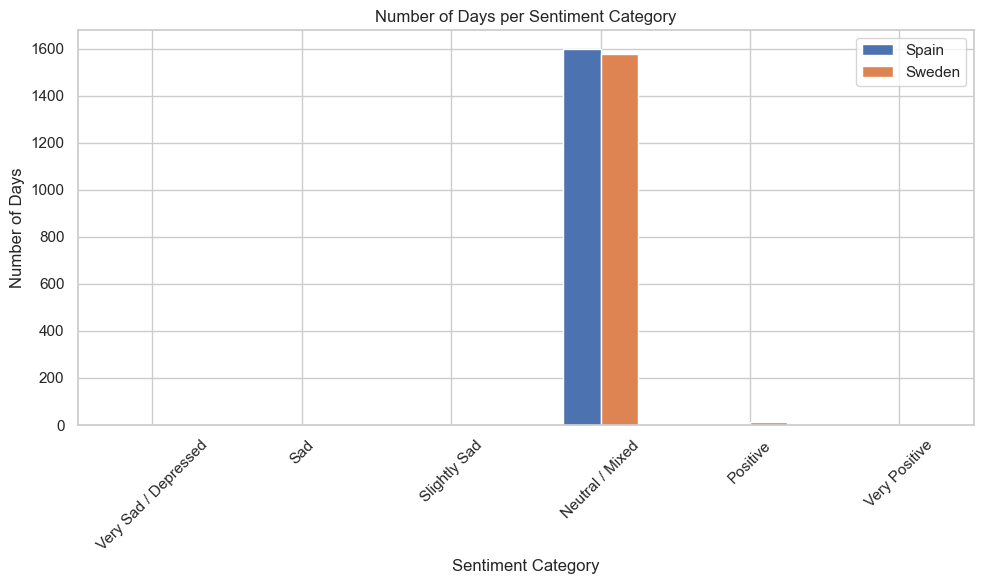

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Count by category for each country
spain_counts = df_spain['sentiment_category'].value_counts().sort_index()
sweden_counts = df_sweden['sentiment_category'].value_counts().sort_index()

# Create DataFrame to facilitate graphing
plot_df = pd.DataFrame({
    'Spain': spain_counts,
    'Sweden': sweden_counts
}).fillna(0)

# Plot
plot_df.plot(kind='bar', figsize=(10,6))

plt.title('Number of Days per Sentiment Category')
plt.ylabel('Number of Days')
plt.xlabel('Sentiment Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_83596/3590604047.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  spain_monthly = df_spain_covid.resample('M', on='date')['score'].mean()
/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_83596/3590604047.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sweden_monthly = df_sweden_covid.resample('M', on='date')['score'].mean()


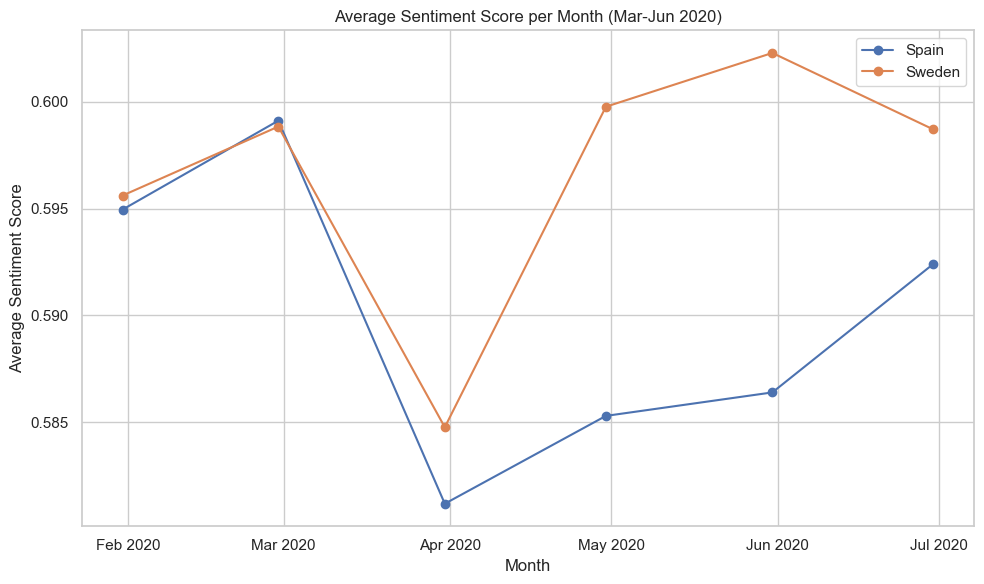

In [25]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime if it isn't already
df_spain['date'] = pd.to_datetime(df_spain['date'])
df_sweden['date'] = pd.to_datetime(df_sweden['date'])

# Filter dates from March to June 2020
start_date = '2020-01-01'
end_date = '2020-06-30'

df_spain_covid = df_spain[(df_spain['date'] >= start_date) & (df_spain['date'] <= end_date)]
df_sweden_covid = df_sweden[(df_sweden['date'] >= start_date) & (df_sweden['date'] <= end_date)]

# Resample by month and calculate mean sentiment score
spain_monthly = df_spain_covid.resample('M', on='date')['score'].mean()
sweden_monthly = df_sweden_covid.resample('M', on='date')['score'].mean()

# Create DataFrame to plot
monthly_df = pd.DataFrame({
    'Spain': spain_monthly,
    'Sweden': sweden_monthly
})

# Plot
plt.figure(figsize=(10,6))
plt.plot(monthly_df.index, monthly_df['Spain'], marker='o', label='Spain')
plt.plot(monthly_df.index, monthly_df['Sweden'], marker='o', label='Sweden')

plt.title('Average Sentiment Score per Month (Mar-Jun 2020)')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Month')
plt.legend()
plt.grid(True)

# Format X-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()


/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_83596/254883043.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spain_period['month'] = df_spain_period['date'].dt.to_period('M')
/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_83596/254883043.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sweden_period['month'] = df_sweden_period['date'].dt.to_period('M')
/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_83596/254883043.py:13: FutureWarning: The default of obser

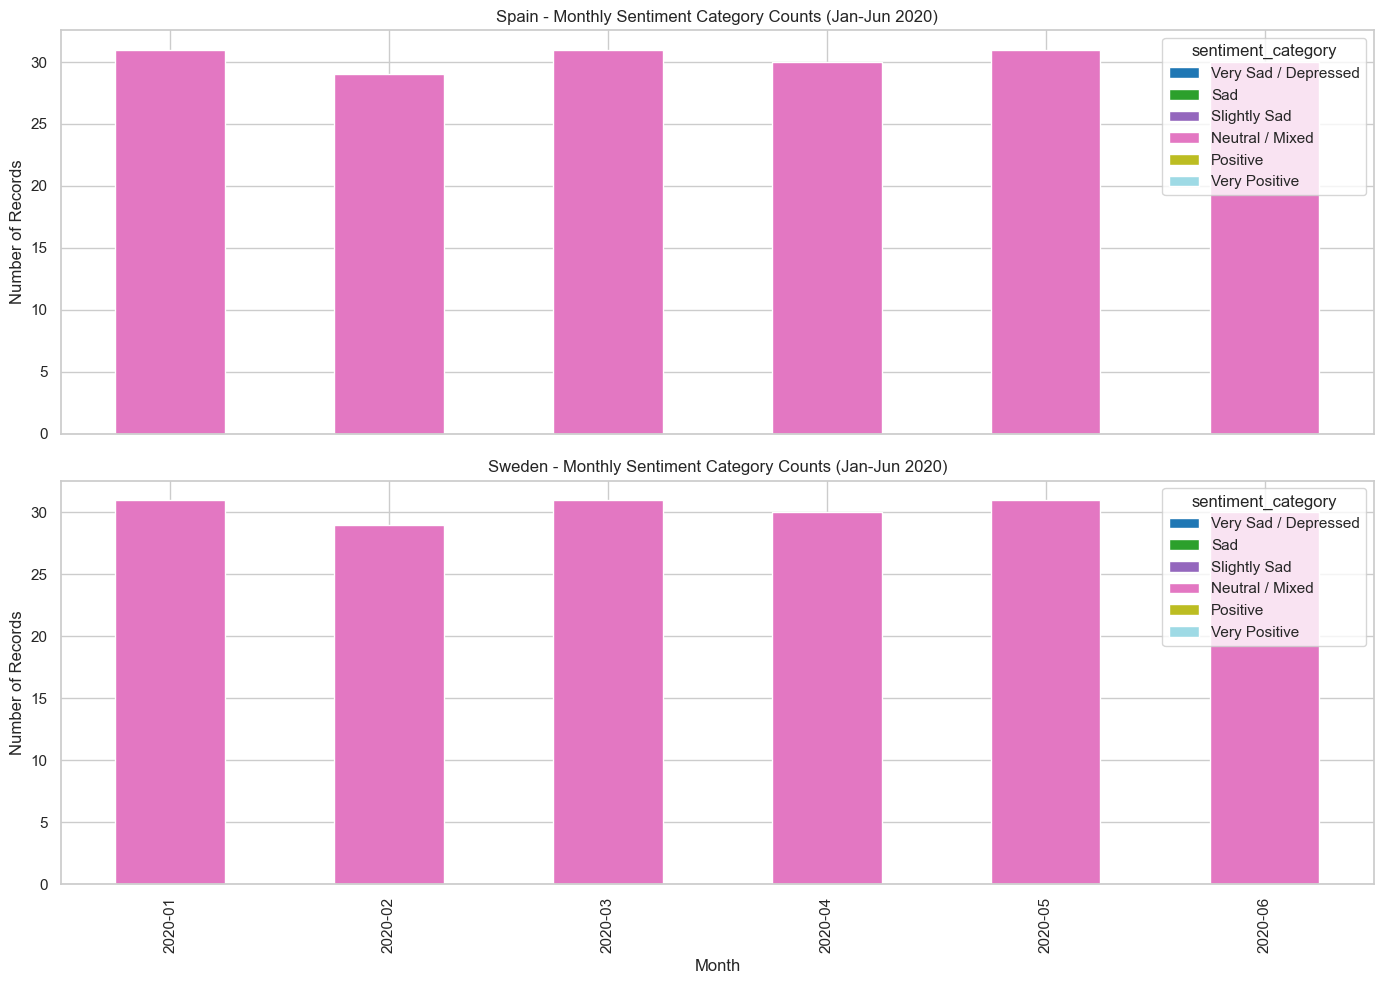

In [26]:
# Filter the data for the period Jan to Jun 2020
start_date = '2020-01-01'
end_date = '2020-06-30'

df_spain_period = df_spain[(df_spain['date'] >= start_date) & (df_spain['date'] <= end_date)]
df_sweden_period = df_sweden[(df_sweden['date'] >= start_date) & (df_sweden['date'] <= end_date)]

# Create a 'month' column to group by month easily
df_spain_period['month'] = df_spain_period['date'].dt.to_period('M')
df_sweden_period['month'] = df_sweden_period['date'].dt.to_period('M')

# Group by month and sentiment_category, counting entries
spain_grouped = df_spain_period.groupby(['month', 'sentiment_category']).size().unstack(fill_value=0)
sweden_grouped = df_sweden_period.groupby(['month', 'sentiment_category']).size().unstack(fill_value=0)

# Plot stacked bar charts
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

spain_grouped.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title('Spain - Monthly Sentiment Category Counts (Jan-Jun 2020)')
axes[0].set_ylabel('Number of Records')

sweden_grouped.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20')
axes[1].set_title('Sweden - Monthly Sentiment Category Counts (Jan-Jun 2020)')
axes[1].set_ylabel('Number of Records')
axes[1].set_xlabel('Month')

plt.tight_layout()
plt.show()


In [27]:
# Define the rainy and cold days
rainy_spain = ['2020-04-19', '2020-04-21', '2020-04-13', '2020-04-20', '2020-04-22']
cold_spain = ['2020-03-12', '2020-03-04', '2020-04-28', '2020-05-01', '2020-05-04']

rainy_sweden = ['2020-03-26', '2020-03-27', '2020-03-25', '2020-03-30', '2020-03-31']
cold_sweden = ['2020-03-14', '2020-03-30', '2020-03-21', '2020-03-22', '2020-03-29']

# Convert to datetime
from datetime import datetime
rainy_spain = pd.to_datetime(rainy_spain)
cold_spain = pd.to_datetime(cold_spain)

rainy_sweden = pd.to_datetime(rainy_sweden)
cold_sweden = pd.to_datetime(cold_sweden)

# Add boolean flags to each DataFrame
df_spain['rainy_day'] = df_spain['date'].isin(rainy_spain)
df_spain['cold_day'] = df_spain['date'].isin(cold_spain)

df_sweden['rainy_day'] = df_sweden['date'].isin(rainy_sweden)
df_sweden['cold_day'] = df_sweden['date'].isin(cold_sweden)


In [28]:
# Spain: average sentiment
avg_spain = df_spain['score'].mean()
avg_spain_rain = df_spain[df_spain['rainy_day']]['score'].mean()
avg_spain_cold = df_spain[df_spain['cold_day']]['score'].mean()

# Sweden: average sentiment
avg_sweden = df_sweden['score'].mean()
avg_sweden_rain = df_sweden[df_sweden['rainy_day']]['score'].mean()
avg_sweden_cold = df_sweden[df_sweden['cold_day']]['score'].mean()

print(f"Spain - Overall avg score: {avg_spain:.3f}")
print(f"Spain - Rainy days avg score: {avg_spain_rain:.3f}")
print(f"Spain - Cold days avg score: {avg_spain_cold:.3f}")

print(f"\nSweden - Overall avg score: {avg_sweden:.3f}")
print(f"Sweden - Rainy days avg score: {avg_sweden_rain:.3f}")
print(f"Sweden - Cold days avg score: {avg_sweden_cold:.3f}")


Spain - Overall avg score: 0.597
Spain - Rainy days avg score: 0.585
Spain - Cold days avg score: 0.581

Sweden - Overall avg score: 0.595
Sweden - Rainy days avg score: 0.590
Sweden - Cold days avg score: 0.585


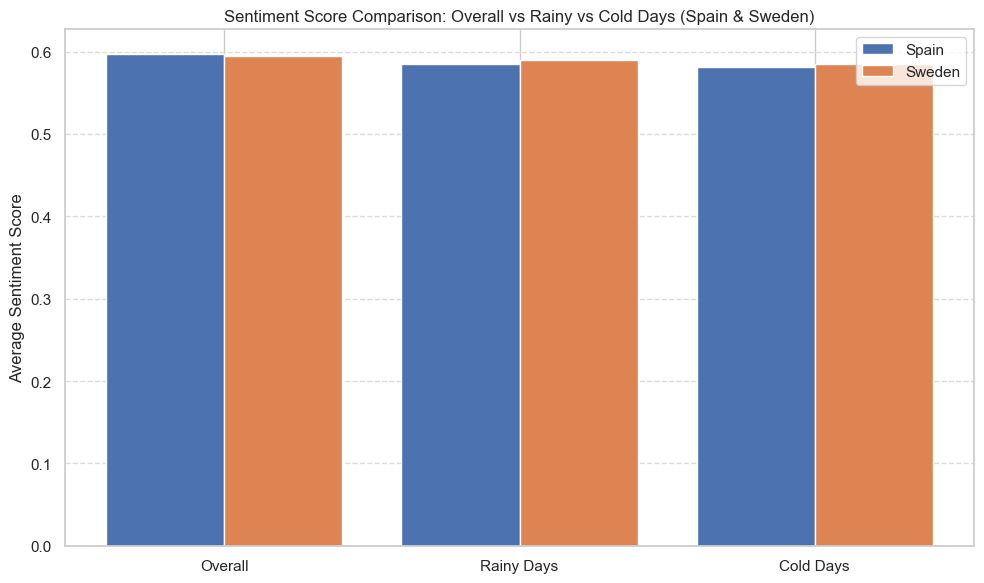

In [29]:
import matplotlib.pyplot as plt

# Updated average sentiment scores
avg_spain = 0.597
avg_spain_rain = 0.585
avg_spain_cold = 0.581

avg_sweden = 0.595
avg_sweden_rain = 0.590
avg_sweden_cold = 0.585

# Labels and scores
labels = ['Overall', 'Rainy Days', 'Cold Days']
spain_scores = [avg_spain, avg_spain_rain, avg_spain_cold]
sweden_scores = [avg_sweden, avg_sweden_rain, avg_sweden_cold]

x = range(len(labels))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], spain_scores, width=0.4, label='Spain')
plt.bar([i + 0.2 for i in x], sweden_scores, width=0.4, label='Sweden')

# Formatting
plt.xticks(ticks=x, labels=labels)
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Score Comparison: Overall vs Rainy vs Cold Days (Spain & Sweden)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# Load your previously saved CSVs for Spain and Sweden
spain_df = pd.read_csv("spain_data.csv", parse_dates=["date"])
sweden_df = pd.read_csv("sweden_data.csv", parse_dates=["date"])


In [35]:
# Coldest and rainiest days during the COVID lockdown period (Mar–Jun 2020)
rainy_days_spain = pd.to_datetime([
    "2020-04-19", "2020-04-21", "2020-04-13", "2020-04-20", "2020-04-22"
])
cold_days_spain = pd.to_datetime([
    "2020-03-12", "2020-03-04", "2020-04-28", "2020-05-01", "2020-05-04"
])

rainy_days_sweden = pd.to_datetime([
    "2020-03-26", "2020-03-27", "2020-03-25", "2020-03-30", "2020-03-31"
])
cold_days_sweden = pd.to_datetime([
    "2020-03-14", "2020-03-30", "2020-03-21", "2020-03-22", "2020-03-29"
])

# Filter tweets from rainy/cold days during lockdown period
rain_spain_df = spain_df[spain_df["date"].isin(rainy_days_spain)]
cold_spain_df = spain_df[spain_df["date"].isin(cold_days_spain)]

rain_sweden_df = sweden_df[sweden_df["date"].isin(rainy_days_sweden)]
cold_sweden_df = sweden_df[sweden_df["date"].isin(cold_days_sweden)]

# Print tweet stats
print("🇪🇸 Spain (COVID Lockdown Period)")
print(f"Overall average daily tweets: {spain_df['n'].mean():.0f}")
print(f"Average tweets on rainy days: {rain_spain_df['n'].mean():.0f}")
print(f"Average tweets on cold days: {cold_spain_df['n'].mean():.0f}")
print()

print("🇸🇪 Sweden (COVID Lockdown Period)")
print(f"Overall average daily tweets: {sweden_df['n'].mean():.0f}")
print(f"Average tweets on rainy days: {rain_sweden_df['n'].mean():.0f}")
print(f"Average tweets on cold days: {cold_sweden_df['n'].mean():.0f}")


🇪🇸 Spain (COVID Lockdown Period)
Overall average daily tweets: 81287
Average tweets on rainy days: 98303
Average tweets on cold days: 93480

🇸🇪 Sweden (COVID Lockdown Period)
Overall average daily tweets: 5855
Average tweets on rainy days: 5146
Average tweets on cold days: 5501


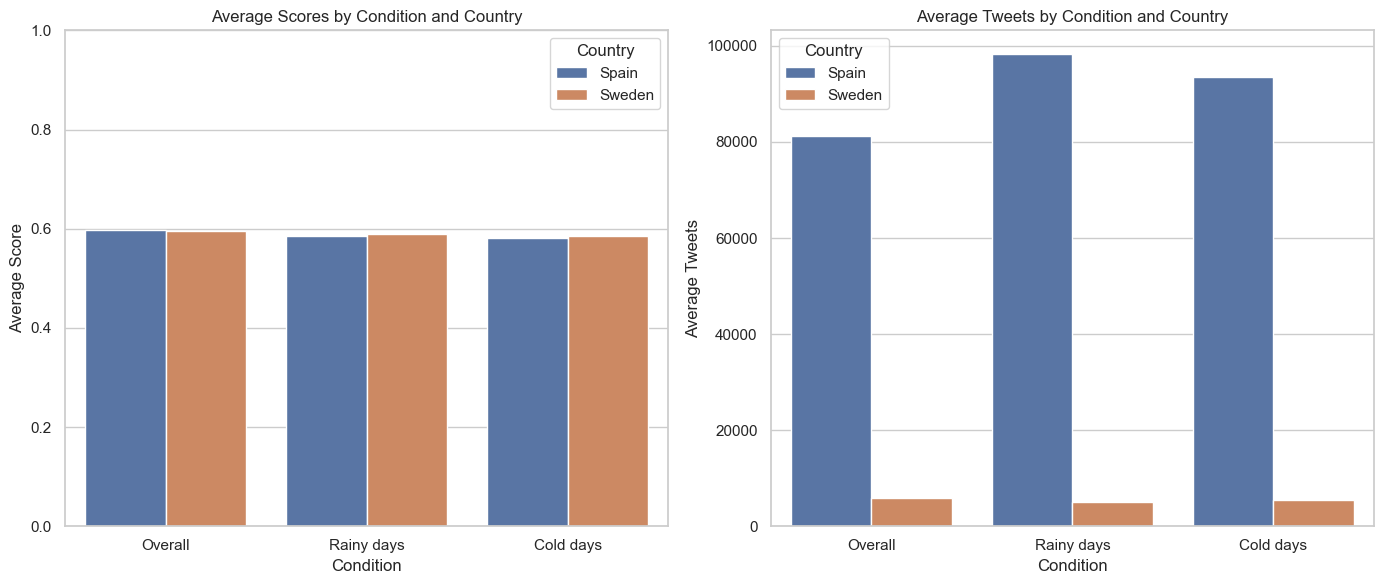

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Scores data
scores = {
    'Condition': ['Overall', 'Rainy days', 'Cold days'] * 2,
    'Country': ['Spain']*3 + ['Sweden']*3,
    'Avg Score': [0.597, 0.585, 0.581, 0.595, 0.590, 0.585]
}

# Tweets data
tweets = {
    'Condition': ['Overall', 'Rainy days', 'Cold days'] * 2,
    'Country': ['Spain']*3 + ['Sweden']*3,
    'Avg Tweets': [81287, 98303, 93480, 5855, 5146, 5501]
}

df_scores = pd.DataFrame(scores)
df_tweets = pd.DataFrame(tweets)

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Scores plot
sns.barplot(x='Condition', y='Avg Score', hue='Country', data=df_scores, ax=axes[0])
axes[0].set_title('Average Scores by Condition and Country')
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Average Score')

# Tweets plot
sns.barplot(x='Condition', y='Avg Tweets', hue='Country', data=df_tweets, ax=axes[1])
axes[1].set_title('Average Tweets by Condition and Country')
axes[1].set_ylabel('Average Tweets')

plt.tight_layout()
plt.show()


In [38]:
import pandas as pd

# Convert the sunny days lists to datetime
sunny_days_spain = pd.to_datetime(['2020-03-26', '2020-05-22', '2020-05-28', '2020-05-31', '2020-05-25'])
sunny_days_sweden = pd.to_datetime(['2020-05-28', '2020-05-16', '2020-05-24', '2020-05-20', '2020-05-22'])

# Filter sunny days for Spain
spain_sunny = spain_df[spain_df['date'].isin(sunny_days_spain)]

# Filter sunny days for Sweden
sweden_sunny = sweden_df[sweden_df['date'].isin(sunny_days_sweden)]

# Calculate averages
avg_score_spain_sunny = spain_sunny['score'].mean()
avg_tweets_spain_sunny = spain_sunny['n'].mean()

avg_score_sweden_sunny = sweden_sunny['score'].mean()
avg_tweets_sweden_sunny = sweden_sunny['n'].mean()

print("Spain Sunny Days - Avg Score:", avg_score_spain_sunny)
print("Spain Sunny Days - Avg Tweets:", avg_tweets_spain_sunny)
print("Sweden Sunny Days - Avg Score:", avg_score_sweden_sunny)
print("Sweden Sunny Days - Avg Tweets:", avg_tweets_sweden_sunny)


Spain Sunny Days - Avg Score: 0.5869608737332761
Spain Sunny Days - Avg Tweets: 83810.6
Sweden Sunny Days - Avg Score: 0.6030264281281651
Sweden Sunny Days - Avg Tweets: 5143.6


In [40]:
import pandas as pd

# Load your previously saved CSVs for Spain and Sweden
spain_df = pd.read_csv("spain_data.csv", parse_dates=["date"])
sweden_df = pd.read_csv("sweden_data.csv", parse_dates=["date"])

# Convert date columns to datetime if not done yet
spain_df['date'] = pd.to_datetime(spain_df['date'])
sweden_df['date'] = pd.to_datetime(sweden_df['date'])

# Your weather days for Spain
spain_sunny_days = pd.to_datetime([
    '2020-03-26', '2020-05-22', '2020-05-28', '2020-05-31', '2020-05-25'
])
spain_rainy_days = pd.to_datetime([
    # Add your known rainy days here, example:
    "2020-04-19", "2020-04-21", "2020-04-13", "2020-04-20", "2020-04-22"
])
spain_cold_days = pd.to_datetime([
    # Add your known cold days here, example:
    "2020-03-12", "2020-03-04", "2020-04-28", "2020-05-01", "2020-05-04"
])

# Your weather days for Sweden
sweden_sunny_days = pd.to_datetime([
    '2020-05-28', '2020-05-16', '2020-05-24', '2020-05-20', '2020-05-22'
])
sweden_rainy_days = pd.to_datetime([
    # Add your known rainy days here, example:
    "2020-03-26", "2020-03-27", "2020-03-25", "2020-03-30", "2020-03-31"
])
sweden_cold_days = pd.to_datetime([
    # Add your known cold days here, example:
    "2020-03-14", "2020-03-30", "2020-03-21", "2020-03-22", "2020-03-29"
])

def assign_weather_condition(df, sunny_days, rainy_days, cold_days):
    conditions = []
    for d in df['date']:
        if d in sunny_days:
            conditions.append('Sunny')
        elif d in rainy_days:
            conditions.append('Rainy')
        elif d in cold_days:
            conditions.append('Cold')
        else:
            conditions.append('Other')
    df['weather_condition'] = conditions
    return df

# Assign to your DataFrames
spain_df = assign_weather_condition(spain_df, spain_sunny_days, spain_rainy_days, spain_cold_days)
sweden_df = assign_weather_condition(sweden_df, sweden_sunny_days, sweden_rainy_days, sweden_cold_days)


In [42]:
spain_df

,date,country,n,score,weather_condition
0,2019-01-01,Spain,74727,0.632933,Other
1,2019-01-02,Spain,73857,0.597488,Other
2,2019-01-03,Spain,77294,0.590331,Other
3,2019-01-04,Spain,74888,0.592296,Other
4,2019-01-05,Spain,78497,0.597714,Other
...,...,...,...,...,...
1599,2022-12-27,Spain,97131,0.602732,Other
1600,2022-12-28,Spain,102982,0.603458,Other
1601,2022-12-29,Spain,104918,0.599221,Other
1602,2022-12-30,Spain,89763,0.595215,Other


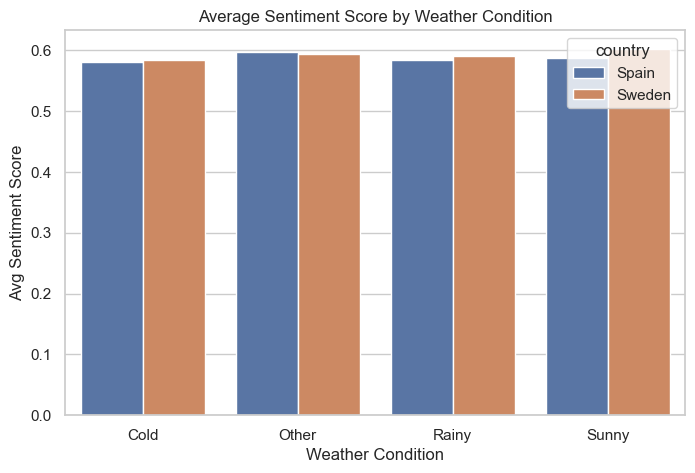

In [43]:
# Average sentiment score by weather condition plot (Spain + Sweden)

import matplotlib.pyplot as plt
import seaborn as sns

def prepare_avg_data(df, country_name):
    avg_scores = df.groupby('weather_condition')['score'].mean().reset_index()
    avg_scores['country'] = country_name
    return avg_scores

spain_avg = prepare_avg_data(spain_df, 'Spain')
sweden_avg = prepare_avg_data(sweden_df, 'Sweden')

avg_scores_all = pd.concat([spain_avg, sweden_avg])

plt.figure(figsize=(8,5))
sns.barplot(data=avg_scores_all, x='weather_condition', y='score', hue='country')
plt.title('Average Sentiment Score by Weather Condition')
plt.ylabel('Avg Sentiment Score')
plt.xlabel('Weather Condition')
plt.show()
